In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

save = '/home/561/mv7494/ENSOAnt_figures/'
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import gridspec
import matplotlib.path as mpath 
import matplotlib.patches as mpatch
import string # for subplot annotation
# from wrf import to_np # conversion to arrays required for arrows on maps 
import matplotlib.ticker as mticker # for ticks in cartopy (longitude/latitude)
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature

rotblau = [[0.4 , 0.  , 0.12], [0.47, 0.02, 0.13], [0.62, 0.07, 0.16], [0.66, 0.16, 0.2],
           [0.8 , 0.3 , 0.27], [0.87, 0.44, 0.35], [0.93, 0.58, 0.45], [0.96, 0.7 , 0.58], 
           [0.98, 0.8 , 0.71], [0.98, 0.94, 0.92], [0.93, 0.95, 0.96], [0.85, 0.91, 0.95],
           [0.76, 0.87, 0.93], [0.64, 0.8 , 0.89], [0.49, 0.72, 0.84], [0.34, 0.62, 0.79], 
           [0.23, 0.53, 0.74], [0.16, 0.44, 0.7] , [0.1 ,0.35, 0.6], [0.05, 0.24, 0.45], [0.02, 0.19, 0.38]]

### Shelf mask for 1/10° model

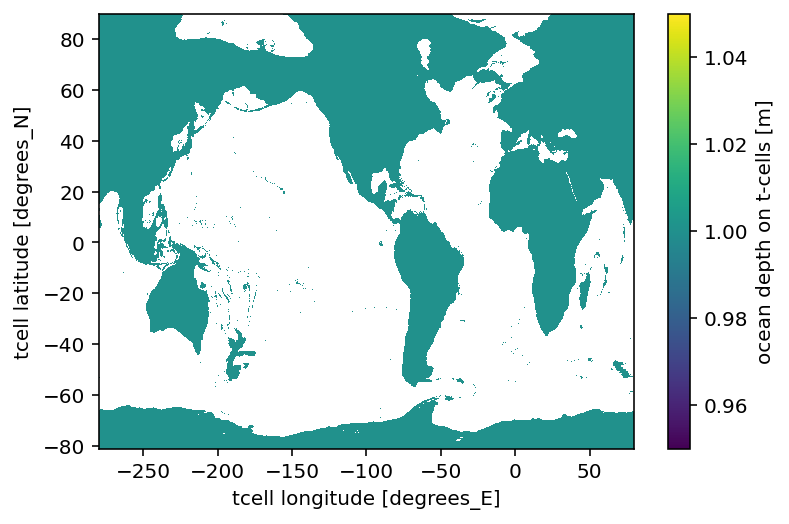

In [2]:
base_spin = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output979'
field = xr.open_mfdataset(base_spin + '/ocean/ocean_grid.nc').ht
above1000 = field.where(field >= 1000,1) # set all values smaller than 1000 to 1
above1000_tcells = above1000.where(above1000 < 1000, drop=False) # remove all values bigger than 1000
above1000_tcells.plot()

### load temperature data using the cosima cookbook

In [3]:
%%time
session = cc.database.create_session()
# ---------------------------------------------------------------------------------- #
depth     = [   0,   47]  # surface to 1017 m depth                                  #
sel_lat   = [   0,  490]  # 81.10 °S - 60.04 °S                                      #
# ---------------------------------------------------------------------------------- #
temp = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle3', variable='temp', # select temperature from the 3rd IAF spin-up cycle
                                    session=session, frequency='1 monthly',             # monthly mean field
                                    attrs={'cell_methods': 'time: mean'},
                                    chunks = {'yt_ocean': '200MB', 'xt_ocean': '200MB'})[0, depth[0]:depth[1], sel_lat[0]:sel_lat[1], :]
temp = (temp - 273.15).load() # convert from [K] to [°C] & load into memory
temp_masked = temp
# Wall time: 17.3 s

CPU times: user 16.4 s, sys: 6.6 s, total: 23 s
Wall time: 27.9 s


### Manually masking out all the deep ocean parts south of the 1000 m isobath location around Antarctica

CPU times: user 733 ms, sys: 26.9 ms, total: 760 ms
Wall time: 753 ms


Text(0.5, 1.0, '\n... to this.')

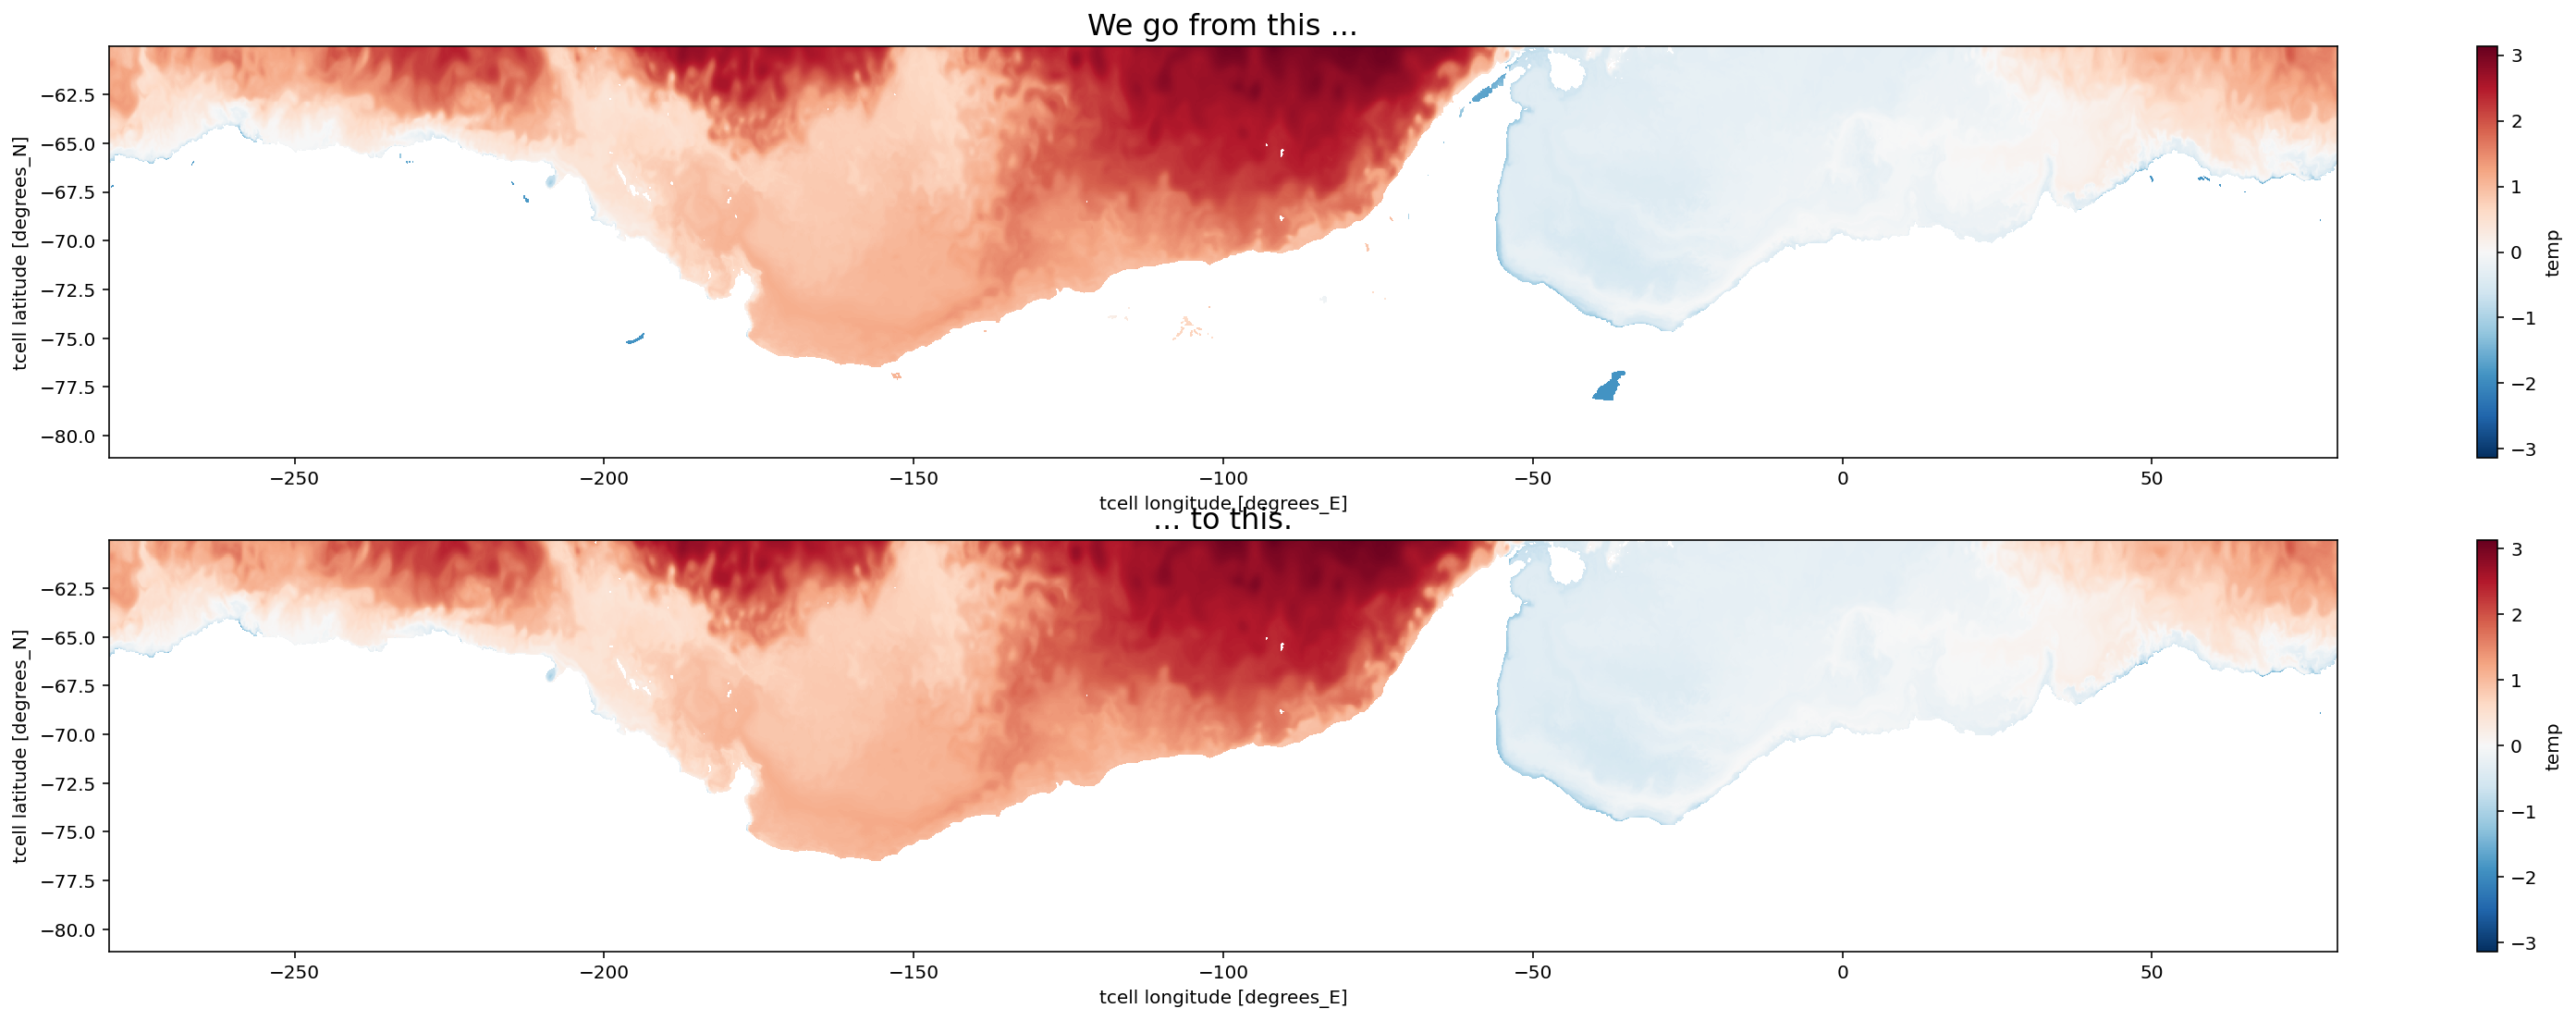

In [4]:
%%time
plt.figure(figsize=(27,9))
plt.subplot(2,1,1); temp[-1,:,:].plot(cmap = 'RdBu_r'); plt.title('We go from this ...', fontsize=16)

temp_masked[-1,:105,:]    = temp[-1,:105,:].where(temp[-1,:105,:] > 5)
temp_masked[-1,:350,0:50]    = temp[-1,:350,0:50].where(temp[-1,:350,0:50] > 5)
temp_masked[-1,:380,120:200]    = temp[-1,:380,120:200].where(temp[-1,:380,120:200] > 5)
temp_masked[-1,:380,450:500]    = temp[-1,:380,450:500].where(temp[-1,:380,450:500] > 5)

temp_masked[-1,:360,600:700]    = temp[-1,:360,600:700].where(temp[-1,:360,600:700] > 5)
temp_masked[-1,:160,700:1000]    = temp[-1,:160,700:1000].where(temp[-1,:160,700:1000] > 5)
temp_masked[-1,:160,1400:1500]    = temp[-1,:160,1400:1500].where(temp[-1,:160,1400:1500] > 5)
temp_masked[-1,:190,1500:2000]    = temp[-1,:190,1500:2000].where(temp[-1,:190,1500:2000] > 5)
temp_masked[-1,:200,1900:2000]    = temp[-1,:200,1900:2000].where(temp[-1,:200,1900:2000] > 5)
temp_masked[-1,:300,2050:2200]    = temp[-1,:300,2050:2200].where(temp[-1,:300,2050:2200] > 5)

temp_masked[-1,:390,2120:2200]    = temp[-1,:390,2120:2200].where(temp[-1,:390,2120:2200] > 5)
temp_masked[-1,:300,2050:2200]    = temp[-1,:300,2050:2200].where(temp[-1,:300,2050:2200] > 5)
temp_masked[-1,:440,2180:2200]    = temp[-1,:440,2180:2200].where(temp[-1,:440,2180:2200] > 5)
temp_masked[-1,:300,2050:2200]    = temp[-1,:300,2050:2200].where(temp[-1,:300,2050:2200] > 5)
temp_masked[-1,400:460,2215:2259]    = temp[-1,400:460,2215:2259].where(temp[-1,400:460,2215:2259] > 5)
temp_masked[-1,330:345,3290:3394]    = temp[-1,330:345,3290:3394].where(temp[-1,330:345,3290:3394] > 5)

temp_masked[-1,300:333,3390:]    = temp[-1,300:333,3390:].where(temp[-1,300:333,3390:] > 5)
temp_masked[-1,:290,2020:2050]    = temp[-1,:290,2020:2050].where(temp[-1,:290,2020:2050] > 5)
temp_masked[-1,450:473,2250:2261]    = temp[-1,450:473,2250:2261].where(temp[-1,450:473,2250:2261] > 5)

temp_masked[-1,400:445,2190:2250]    = temp[-1,400:445,2190:2250].where(temp[-1,400:445,2190:2250] > 5)

plt.subplot(2,1,2); temp_masked[-1,:,:].plot(cmap = 'RdBu_r'); plt.title('\n... to this.', fontsize=16)
# Wall time: 418 ms

### Selecting only the West Antarctic region

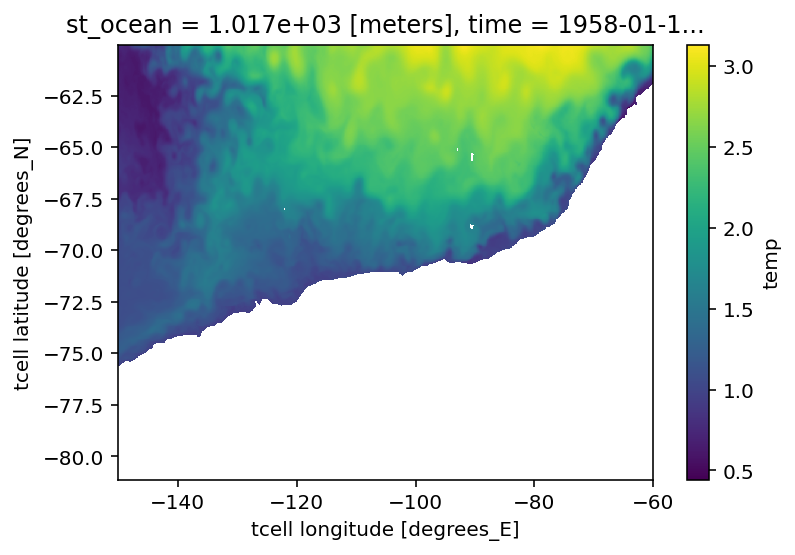

In [5]:
sel_lonWA = [1299, 2200]  # 150°W - 60°W
temp_masked_WA = temp_masked[:,:,sel_lonWA[0]:sel_lonWA[1]]
temp_masked_WA[-1,:,:].plot()

### Function to get the angle between a small rectangle of across-shelf data relative to the shelf break

In [6]:
%%time 
import scipy
Re = 6378000.0                   # radius of the Earth
lat_to_km = 2*np.pi*Re/360.0/1e3 # for converting latitudes to kilometer
len_of_rectangle = 40 # number of grid cells in each rectangle

def get_angle(data):
    a = np.linspace(0,len(data.xt_ocean), len(data.xt_ocean)+1)
        
    angle_array = np.full(int(len(data.xt_ocean)/len_of_rectangle), np.nan) # prepare empty array to fill up
    dx_array    = np.full(int(len(data.xt_ocean)/len_of_rectangle), np.nan) # prepare empty array to fill up
    dy_array    = np.full(int(len(data.xt_ocean)/len_of_rectangle), np.nan) # prepare empty array to fill up
    
    lat_left_array    = np.full(int(len(data.xt_ocean)/len_of_rectangle), np.nan) # prepare empty array to fill up
    lon_left_array    = np.full(int(len(data.xt_ocean)/len_of_rectangle), np.nan) # prepare empty array to fill up
    lat_right_array   = lat_left_array; lon_right_array = lon_left_array # ... and copy over the structure for the right-hand side arrays of the rectangle


    for f,g in zip(a[0::len_of_rectangle],a[len_of_rectangle::len_of_rectangle]): # loop through the pairs
        f = int(f); g = int(g)

        # get the left-most grid cell and evaluate the first grid cell with data, i.e. just after the shelf break
        left  = pd.Series(data[-1,:,f]).first_valid_index()
        lat_left = data[-1,:,f][left].yt_ocean.values # latitude of said grid cell
        lon_left = data[-1,:,f][left].xt_ocean.values # longitude
        
        # now same with the right-most grid cell in the 10-grid cell slice
        right = pd.Series(data[-1,:,g]).first_valid_index()
        lat_right = data[-1,:,g][right].yt_ocean.values
        lon_right = data[-1,:,g][right].xt_ocean.values 

        # using trigonometry to get the angle of the shelf break between the first and last grid cell in a ten-grid-cell slice
        dy_array[int(f/len_of_rectangle)] = (lat_right - lat_left) * lat_to_km                                            # latitudinal distance [km]
        dx_array[int(f/len_of_rectangle)] = (lon_right - lon_left) * lat_to_km * np.cos(np.pi/180*(lat_right+lat_left)/2) # longitudinal distance [km]

        angle_array[int(f/len_of_rectangle)]    = (np.arctan(dy_array[int(f/len_of_rectangle)]/dx_array[int(f/len_of_rectangle)])) * 180/np.pi # calculate the angle and convert from rad to ° using (*180/np.pi)
        lat_left_array[int(f/len_of_rectangle)] = lat_left; lat_right_array[int(f/len_of_rectangle)] = lat_right
        lon_left_array[int(f/len_of_rectangle)] = lon_left; lon_right_array[int(f/len_of_rectangle)] = lon_right

    return angle_array, dx_array, dy_array, lat_left_array, lon_left_array, lat_right_array, lon_right_array
[angle_array, dx_array, dy_array, lat_left_array, lon_left_array, lat_right_array, lon_right_array] = get_angle(temp_masked_WA)

CPU times: user 57.2 ms, sys: 0 ns, total: 57.2 ms
Wall time: 55.1 ms


### Select the rectangle, rotate it

In [7]:
%%time
def get_lon_lat_rotated(w, x, y, O, N, ang, delx, dely, res, data):
    "This function does this and this:"
    "The input is: w = 5*lat_to_km # width of rectangle [km]"
    "              x = -110         # x-center of the rectangle [°lon]"
    "              y = -72          # y-center of the rectangle [°lat]"
    "              O = 3*lat_to_km # offshore length [km]"
    "              N = 4*lat_to_km  # onshore length [km]"
    "              ang = 20 * (np.pi/180) # angle of coastline in (°rad)"
    "              delx = .5*lat_to_km  # delta_x [km]"
    "              dely = .35*lat_to_km # delta_y [km]"
    "              res = 10 # increase the resolution of the interpolated data by 10"
    "              data = the data used to do the interpolation"
   

    # # -------------------------------------------------- #
    # w = 0.01
    # x = lon_left_array[f] - (lon_left_array[f]-lon_left_array[f+1])/2
    # y = lat_left_array[f] + (lat_left_array[f]-lat_left_array[f+1])/2
    # O = 2
    # N = 2 
    # ang = angle_array[0] 
    # delx = dx_array[0] 
    # dely = dy_array[0] 
    # res = 10 
    # data = anom_EN
    # # -------------------------------------------------- #


    # conversions from the input from [°lat/°lon] to [km]
    w    = w * lat_to_km 
    O    = O * lat_to_km 
    N    = N * lat_to_km
    ang  = ang * (np.pi/180)
    delx = delx * lat_to_km
    dely = dely * lat_to_km

    x_r = np.linspace(-w,w,res)#*int(2*w/delx))   # x-axis of rotated section [km]
    y_r = np.linspace(-N,O,res)#*int((N+O)/dely)) # y-axis of rotated section [km]
    [X_r, Y_r] = np.meshgrid(x_r, y_r) # create meshgrid from the rotated coordinates [km]

    # create empty arrays which get filled in with the rotated values in 
    lat_rot = np.full((len(x_r), len(y_r)), np.nan) # [km]
    lon_rot = np.full((len(x_r), len(y_r)), np.nan) # [km]

    import math # package that has the atan2 (arctan2) function 
    for i in range(len(x_r)):                     # loop through each x-axis grid cell [km]
        for j in range(len(y_r)):                 # loop through each y-axis grid cell [km]
            phi = math.atan2(y_r[j],x_r[i]);      # angle from center point
            leng = np.sqrt(x_r[i]**2+y_r[j]**2);  # distance from center point

            # calculating the rotated longitude and latitude coordinates [°lat, °lon]
            # -------------------------------------------------------------------------------------------------------- #
            lat_rot[i,j] = y + np.sin(phi+ang)*leng/lat_to_km; # lat of point
            lon_rot[i,j] = x + np.cos(phi+ang)*leng/lat_to_km/np.cos(np.pi/180*(lat_rot[i,j]+y)/2);  # lon of point
            # -------------------------------------------------------------------------------------------------------- #

    interpolated_data = np.full((len(data.st_ocean), len(x_r), len(y_r)), np.nan) # create empty array with same dimensions as lon_rot

    # the interpolation here
    for z in range(len(data.st_ocean)): # loop over all depth layers
        # create interpolation function         (old x-axis,    old y-axis,                 old data)
        function = scipy.interpolate.interp2d(data.xt_ocean, data.yt_ocean, data[z,:,:].fillna(1e6)) # fill all nan with 9999

        for i in range(len(x_r)): # loop through all the grid cells and interpolate the data onto the rotated grid
            for j in range(len(y_r)): 
                interpolated_data[z,i,j] = function(lon_rot[i,j], lat_rot[i,j])
        # if z % 20 == 0: print('up to st_ocean level '+ str(z) + ' done') # print out statement every 5-th z level to see progress through the loops
        interpolated_data[interpolated_data>6]=np.nan # to get the nan back, replace all data that is above 6°C with nan
                                                      # this is a valid assumption because temperature anomalies are never bigger than that 

    # print('----------------------------')
    return interpolated_data, lon_rot, lat_rot, x, y, x_r, y_r # save the output variables I need
    # Wall time: 21.5 µs

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


loop at 130°W


NameError: name 'a' is not defined

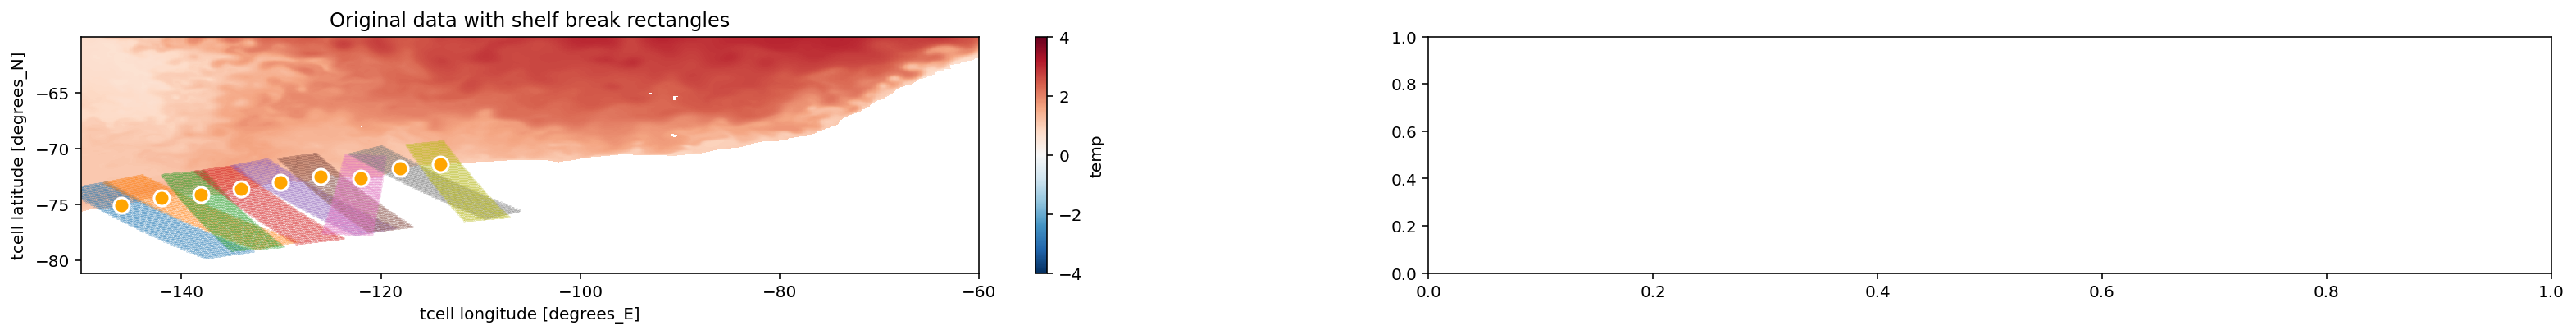

In [10]:
%%time
# (  w,   x,   y, O, N, ang, delx, dely, res, data):
# [interpolated_data, lon_rot_WAP, lat_rot_WAP, x, y, x_r, y_r] = get_lon_lat_rotated(4.2, -72, -70, 2, 2, angle_array[0], dx_array[0], dy_array[0], 10, anom_EN)
plt.figure(figsize=(27,9))
interp      = np.full((47, 50, len(angle_array)), np.nan) # empty array full of NaNs which gets filled up
interp_mask = np.full((47, 50, len(angle_array)), np.nan) # same array structure for the mask as well

data = temp_masked_WA;    panel = 1
vmin = -4; vmax = 4
mask = data.where(np.logical_or(data.isnull(), xr==0), 1).fillna(0) # create an ocean-land mask where ocean grid cells have value 1 and land grid cells have nan

plt.subplot(3,2,panel); (temp_masked_WA[-1,:,:]).plot(cmap = 'RdBu_r', vmin=-4,vmax=4) # plot the top down view of the shelf break 
    

# Here the BIG LIFT (the key part of the script)
for f in range(9):#len(angle_array)): # range(len(angle_array)-1): # range(49,71) = Amundsen Sea 101°W - 80°W with 10 grid cells 
                                                        # range(60,87) = Amundsen Sea 101°W - 80°W with  8 grid cells
                                                        # range(42,75) = 115°W - 90°W with  10 grid cells
                                                        # range(49,75) = 110.05°W - 90.05°W with  10 grid cells
    if np.round(lon_left_array[f],0) % 10 == 0:
        print('loop at ' + str(np.abs(int(np.round(lon_left_array[f],0)))) + '°W')

    # using the function from above to interpolate the data onto an across-shelf grid
    [interpolated_data, lon_rot_ABS, lat_rot_ABS, x_ABS, y_ABS, x_r_ABS, y_r_ABS] = get_lon_lat_rotated(.65, # width of rectangle
                                                                                                        lon_left_array[f] + (lon_right_array[f]-lon_left_array[f])/2, # x-coordinate of rectangle center
                                                                                                        lat_left_array[f] + (lat_right_array[f]-lat_left_array[f])/2, # y-coordinate of rectangle center
                                                                                                        2,                # off-shore length
                                                                                                        5,                # on-shore length
                                                                                                        angle_array[f],   # angle of rectangle
                                                                                                        dx_array[f],      # length, i.e., lon. distance of rectangle
                                                                                                        dy_array[f],      # height, i.e., lat. distance of rectangle
                                                                                                        50,               # resolution of interpolation 
                                                                                                        data)             # data to interpolate
    # same interpolation for the mask
    [interpolated_mask, lon_rot_ABS, lat_rot_ABS, x_ABS, y_ABS, x_r_ABS, y_r_ABS] = get_lon_lat_rotated(.65, lon_left_array[f] + (lon_right_array[f]-lon_left_array[f])/2, 
                                                    lat_left_array[f] + (lat_right_array[f]-lat_left_array[f])/2, 2, 5, angle_array[f], dx_array[f], dy_array[f], 50, mask)  

    # plot the rectangles along the shelf break on the left
    plt.plot(x_ABS,y_ABS, marker = 'o', c = 'white', markersize=10); plt.plot(x_ABS,y_ABS, marker = 'o', c = 'orange', markersize=7) # orange marker with white offset
    plt.title('Original data with shelf break rectangles')
    plt.scatter(lon_rot_ABS.reshape(-1), lat_rot_ABS.reshape(-1), marker = '.', s=5e-2)                                # 4.2, -70, -69, 2, 2, 76, .5, .5, 10      

    interp[:,:,f]      = np.nanmean(interpolated_data, axis=1) # take the zonal mean of each rotated rectangle          
    interp_mask[:,:,f] = np.nansum(interpolated_mask, axis=1)
    
    interp_mask[interp_mask <  10] = np.nan # replace all grid cells that have less than 20 % data (and therefore are 80 % of the time on land) with nan
    interp_mask[interp_mask >= 10] = 1      # replace all grid cells that have more than 20 % data with a 1 index   
    interp = interp * interp_mask           # multiply this mask with the interpolated data to remove the 20 % grid cells on the shelf that are 80 % on land 
    
# plot the interpolated data across the shelf on the right
plt.subplot(3,2,panel+1); ax1 = plt.contourf(y_r_ABS, temp_masked_WA.st_ocean, np.nanmean(a, axis=2), cmap='RdBu_r', levels = np.linspace(vmin,vmax,50))

plt.axvline(0, c = 'blue', linewidth=2.5); plt.colorbar(ax1); plt.title('Zonal mean (shelf break in blue)')

plt.gca().invert_yaxis()
print('----------------------')
# Wall time: 2min 5 s

loop at 130°W
loop at 110°W
loop at 90°W
loop at 70°W
----------------------
CPU times: user 1min 26s, sys: 982 ms, total: 1min 27s
Wall time: 1min 31s


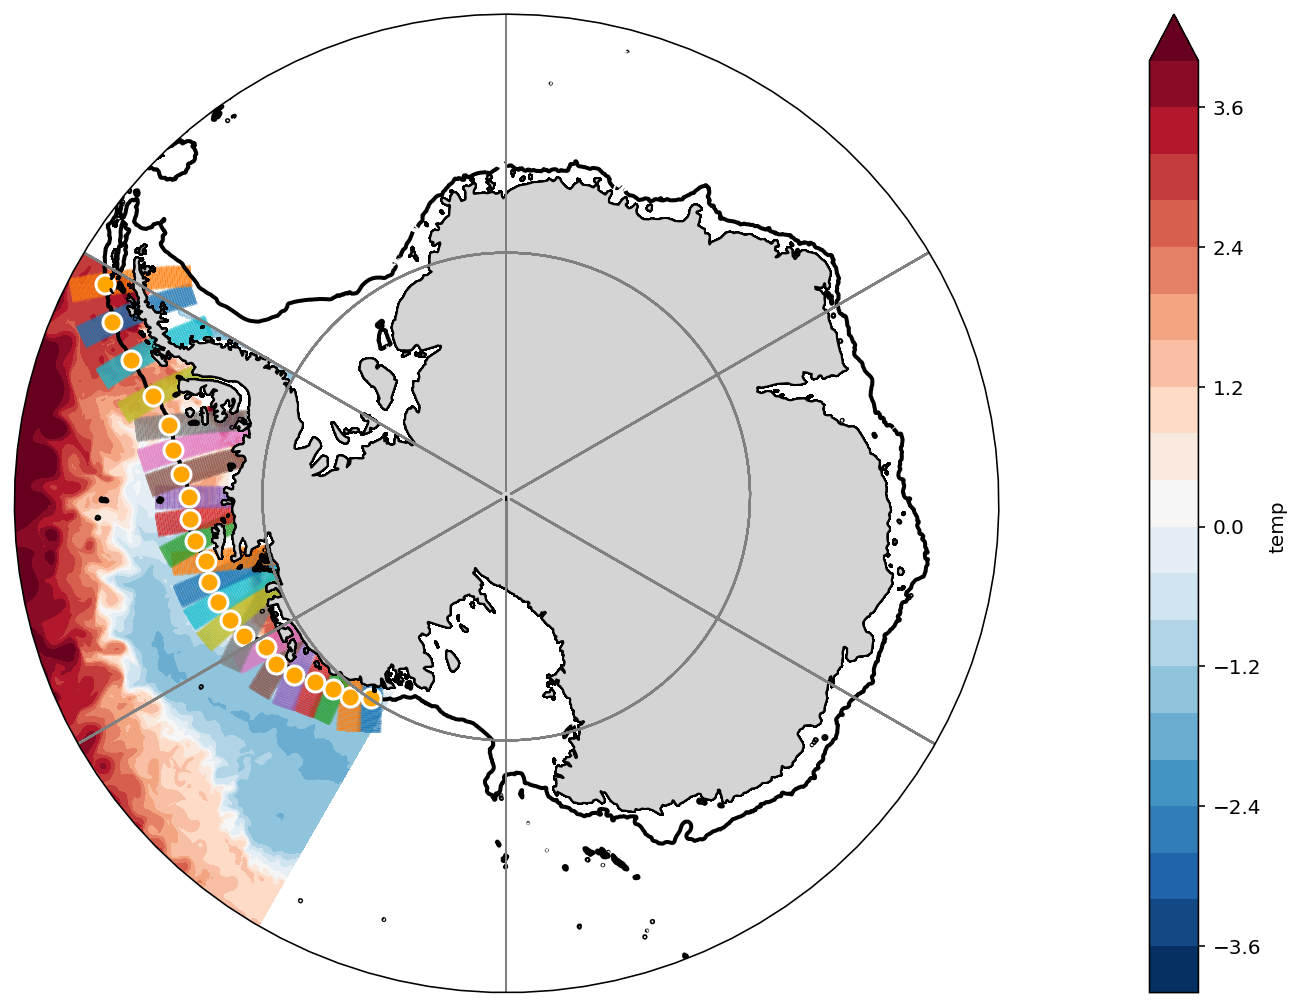

In [20]:
%%time
# (  w,   x,   y, O, N, ang, delx, dely, res, data):
# [interpolated_data, lon_rot_WAP, lat_rot_WAP, x, y, x_r, y_r] = get_lon_lat_rotated(4.2, -72, -70, 2, 2, angle_array[0], dx_array[0], dy_array[0], 10, anom_EN)
plt.figure(figsize=(27,9)); gs = gridspec.GridSpec(1,1) 
interp      = np.full((47, 50, len(angle_array)), np.nan) # empty array full of NaNs which gets filled up
interp_mask = np.full((47, 50, len(angle_array)), np.nan) # same array structure for the mask as well

data = temp_masked_WA;    panel = 1
vmin = -4; vmax = 4

ax1 = plt.subplot(gs[0,0], projection=ccrs.SouthPolarStereo(central_longitude=0))
ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
p1 = (data[1,:,:]).plot.contourf(transform=ccrs.PlateCarree(), cmap='RdBu_r', levels=np.linspace(-4,4,21))
p111 = field.plot.contour(levels = [1000], linewidths=2, cmap='k', transform=ccrs.PlateCarree()) # 1000 m isobath

# Here the BIG LIFT (the key part of the script)
for f in range(len(angle_array)): # range(len(angle_array)-1): # range(49,71) = Amundsen Sea 101°W - 80°W with 10 grid cells 
                                                        # range(60,87) = Amundsen Sea 101°W - 80°W with  8 grid cells
                                                        # range(42,75) = 115°W - 90°W with  10 grid cells
                                                        # range(49,75) = 110.05°W - 90.05°W with  10 grid cells
    if np.round(lon_left_array[f],0) % 10 == 0:
        print('loop at ' + str(np.abs(int(np.round(lon_left_array[f],0)))) + '°W')

    # using the function from above to interpolate the data onto an across-shelf grid
    [interpolated_data, lon_rot_ABS, lat_rot_ABS, x_ABS, y_ABS, x_r_ABS, y_r_ABS] = get_lon_lat_rotated(.65, # width of rectangle
                                                                                                        lon_left_array[f] + (lon_right_array[f]-lon_left_array[f])/2, # x-coordinate of rectangle center
                                                                                                        lat_left_array[f] + (lat_right_array[f]-lat_left_array[f])/2, # y-coordinate of rectangle center
                                                                                                        2,                # off-shore length
                                                                                                        5,                # on-shore length
                                                                                                        angle_array[f],   # angle of rectangle
                                                                                                        dx_array[f],      # length, i.e., lon. distance of rectangle
                                                                                                        dy_array[f],      # height, i.e., lat. distance of rectangle
                                                                                                        50,               # resolution of interpolation 
                                                                                                        data)             # data to interpolate    
    
    p2 = plt.plot(x_ABS,y_ABS, marker = 'o', c = 'white', markersize=10, transform=ccrs.PlateCarree())
    p3 = plt.plot(x_ABS,y_ABS, marker = 'o', c = 'orange', markersize=7, transform=ccrs.PlateCarree())
    p4 = plt.scatter(lon_rot_ABS.reshape(-1), lat_rot_ABS.reshape(-1), marker = '.', s=5e-2, transform=ccrs.PlateCarree())
    def fancy_plot(ax):
        ax.gridlines(color='grey', linewidth=1, alpha=1, # dots as grid lines
                      xlocs=range(-180, 180, 60), # longitude grid lines
                      ylocs= np.linspace(-45, -90, num=4)) # latitude grid lines
        ax.coastlines(); # add coast lines
        theta = np.linspace(0, 2*np.pi, 100); center, radius = [0.5, 0.5], .5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        ax.set_boundary(circle, transform=ax.transAxes)
        # colour in land and coastlines
        ax.add_feature(cfeature.LAND, edgecolor = 'black', facecolor = [.83,.83,.83], zorder = 2)
    fancy_plot(ax1)
    
print('----------------------')

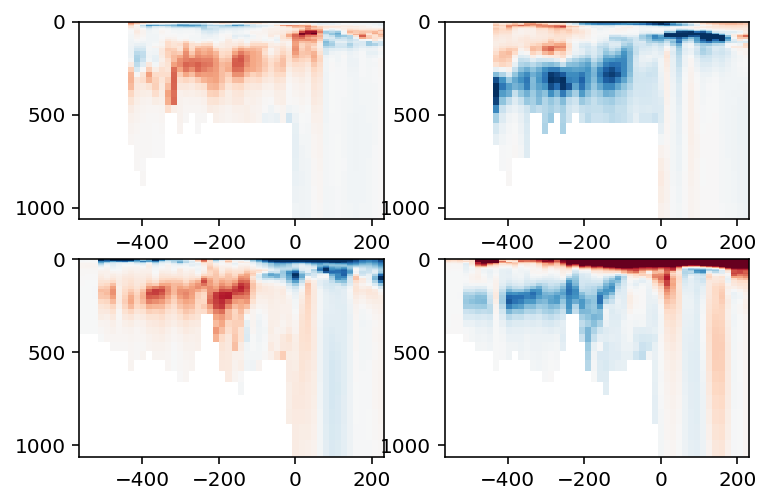

In [22]:
plt.subplot(2,2,1); 
plt.pcolormesh(y_r_ABS, temp_clim.st_ocean, interpolated_temp_EN_ABS, cmap='RdBu_r', vmin=-.5, vmax=.5); plt.gca().invert_yaxis()
# plt.contour(y_r_ABS, temp_clim.st_ocean, interpolated_mask_ABS, levels = [1], colors = ['k'], linewidths=5); plt.gca().invert_yaxis()
plt.subplot(2,2,2); 
plt.pcolormesh(y_r_ABS, temp_clim.st_ocean, interpolated_temp_LN_ABS, cmap='RdBu_r', vmin=-.5, vmax=.5); plt.gca().invert_yaxis()
# plt.contour(y_r_ABS, temp_clim.st_ocean, interpolated_mask_ABS, levels = [1], colors = ['k'], linewidths=5); plt.gca().invert_yaxis()

plt.subplot(2,2,3); 
plt.pcolormesh(y_r_WAP, temp_clim.st_ocean, interpolated_temp_EN_WAP, cmap='RdBu_r', vmin=-.5, vmax=.5); plt.gca().invert_yaxis()
# plt.contour(y_r_WAP, temp_clim.st_ocean, interpolated_mask_WAP, levels = [1], colors = ['k'], linewidths=5); plt.gca().invert_yaxis()
plt.subplot(2,2,4); 
plt.pcolormesh(y_r_WAP, temp_clim.st_ocean, interpolated_temp_LN_WAP, cmap='RdBu_r', vmin=-.5, vmax=.5); plt.gca().invert_yaxis()
# plt.contour(y_r_WAP, temp_clim.st_ocean, interpolated_mask_WAP, levels = [.2], colors = ['g'], linewidths=5); plt.gca().invert_yaxis()

NameError: name 'lon_rot_WAP' is not defined

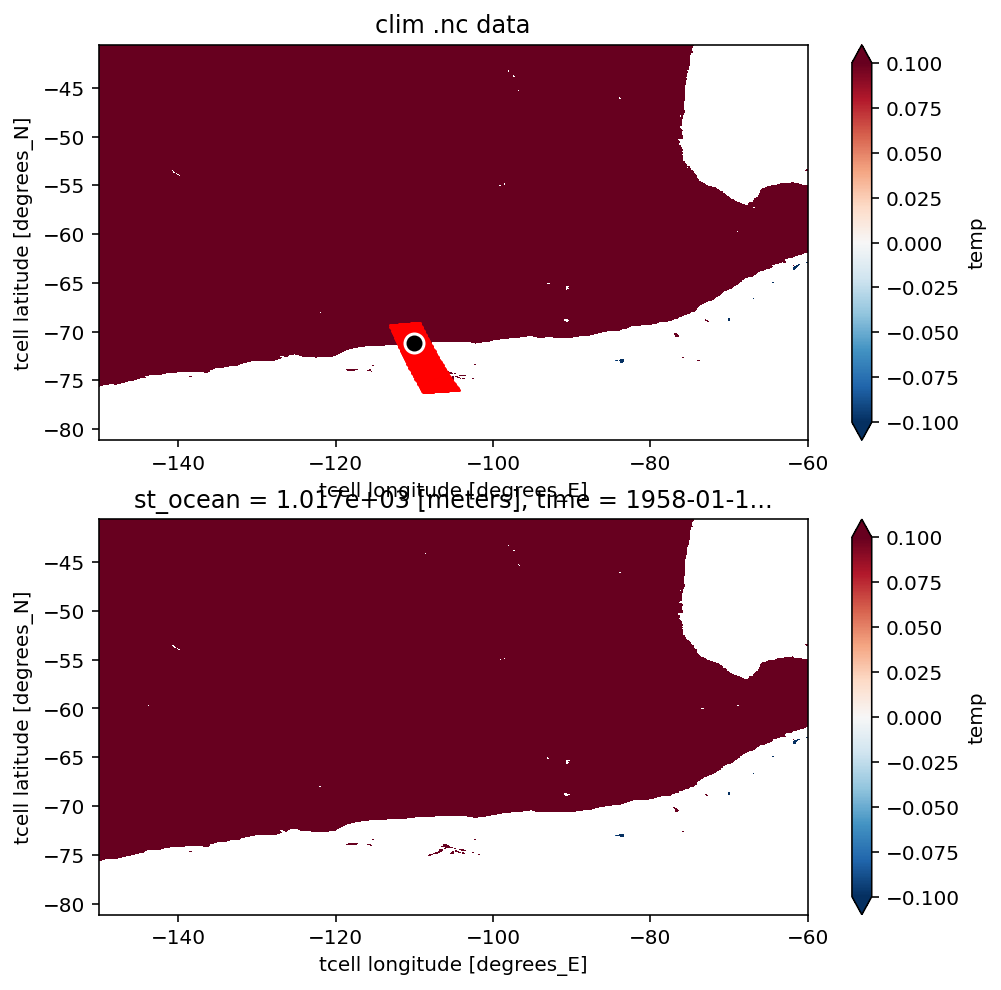

In [18]:
%%time
# ------------------------------------------------------------ #
zlev = -1 # for which z level to do the quick check?           #
data = temp_ACCESS_WA # anom_EN
# ------------------------------------------------------------ #

plt.figure(figsize=(27,8))
plt.subplot(2,3,1)
data[-1,:,:].plot(cmap = 'RdBu_r', vmin = -.1, vmax = .1)
plt.scatter(lon_rot_ABS.reshape(-1), lat_rot_ABS.reshape(-1), marker = '.', s=1, c='red')
plt.plot(x_ABS,y_ABS, marker = 'o', c = 'white', markersize=10); plt.title('clim .nc data'); plt.plot(x_ABS,y_ABS, marker = 'o', c = 'k', markersize=7)

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- #
plt.subplot(2,3,4)
data[-1,:,:].plot(cmap = 'RdBu_r', vmin = -.1, vmax = .1)
plt.scatter(lon_rot_WAP.reshape(-1), lat_rot_WAP.reshape(-1), marker = '.', s=1, c='red')
plt.plot(x_WAP,y_WAP, marker = 'o', c = 'white', markersize=10); plt.title('clim .nc data'); plt.plot(x_WAP,y_WAP, marker = 'o', c = 'k', markersize=7)
